函式庫

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [6]:
dice_data = np.array([1,2,3,4,5,6])
print("random pick: ", np.random.choice(dice_data,1))

calc_step = 1000
dice_rolls = np.random.choice(dice_data, calc_step)

for i in range(1,7):
  p = len(dice_rolls[dice_rolls == i])
  print("The probability of ", i," is ", p/calc_step)

print("-----------------------------------------------")

coin_data = np.array([0,1])
coin_rolls = np.random.choice(coin_data, calc_step)
for i in range(0,2):
  p = len(coin_rolls[coin_rolls == i])
  print("The probability of ", i," is ", p/calc_step)

random pick:  [6]
The probability of  1  is  0.2
The probability of  2  is  0.179
The probability of  3  is  0.153
The probability of  4  is  0.143
The probability of  5  is  0.163
The probability of  6  is  0.162
-----------------------------------------------
The probability of  0  is  0.493
The probability of  1  is  0.507


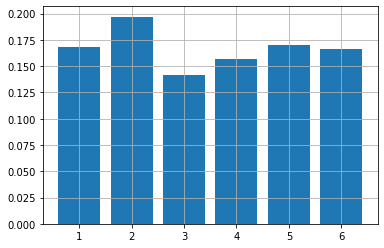

In [7]:
#Uniform distribution
dice_data = np.array([1,2,3,4,5,6])
calc_step = 1000
dice_rolls = np.random.choice(dice_data, calc_step)

prob_data = np.array([])
for i in range(1,7):
  p = len(dice_rolls[dice_rolls == i])
  prob_data = np.append(prob_data, p/calc_step)

plt.bar(dice_data, prob_data)
plt.grid(True)

[0 1]
The probability of  0  is  0.625
The probability of  1  is  0.375


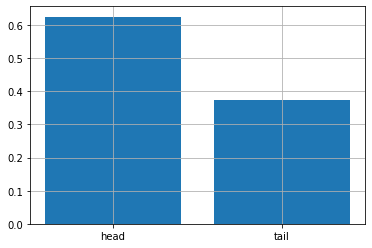

In [12]:
#Bernoulli distribution
coin_data = np.array([0,0,0,0,0,1,1,1])
prob_be_data = np.array([])

test = np.unique(coin_data)
print(test)
for i in np.unique(coin_data):
  p = len(coin_data[coin_data == i])
  prob_be_data = np.append(prob_be_data, p/len(coin_data))
  print("The probability of ", i," is ", p/len(coin_data))

plt.bar([0, 1], prob_be_data, align = 'center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

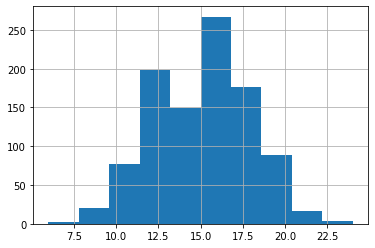

In [13]:
#Binomial distribution
np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
plt.hist(x)
plt.grid(True)

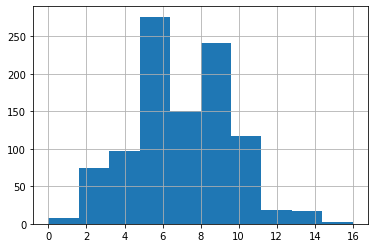

In [14]:
#Poisson distribution
x = np.random.poisson(7,1000) #frequency=7, sample size = 1000
plt.hist(x)
plt.grid(True)


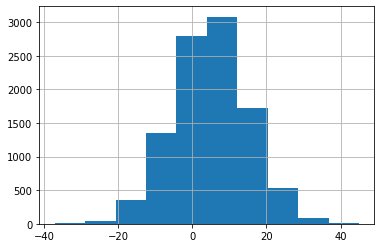

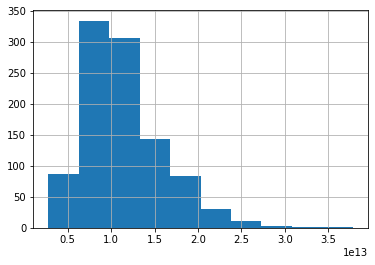

In [16]:
#Normal distribution
x = np.random.normal(5,10,10000) #Mean,Std,Sample
plt.figure()
plt.hist(x)
plt.grid(True)

x = np.random.lognormal(30,0.4,1000)
plt.figure()
plt.hist(x)
plt.grid(True)

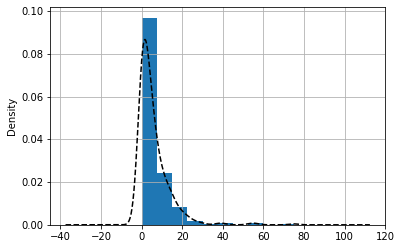

In [18]:
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(zip_file_url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data_math = pd.read_csv('student-mat.csv', sep=';')
#Kernel Density Estimation
student_data_math.absences.plot(kind = 'kde', style = 'k--')
student_data_math.absences.hist(density=True)
plt.grid(True)

Practice_1
1. mean=0, var=1的常態分佈中取出10000次n=100的樣本，以直方圖呈現樣本分佈
2. 對數常態
3. Math的G1成績，直方圖與核密度函數(Kernel Density Estimation)推測

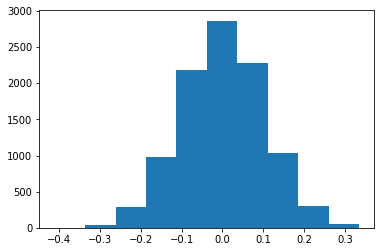

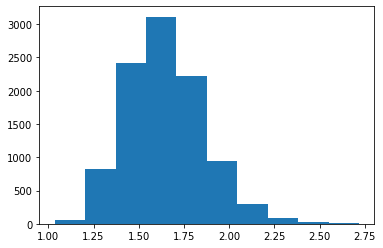

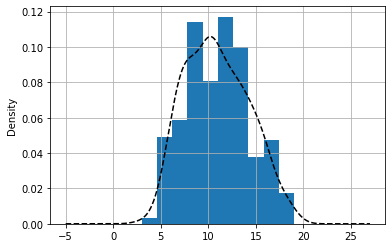

In [22]:
norm = ([])
for i in range(10000):
  x = np.random.normal(0,1,100)
  norm = np.append(norm, x.mean())
plt.figure()
plt.hist(norm)

norm1 = ([])
for i in range(10000):
  x = np.random.lognormal(0,1,100)
  norm1 = np.append(norm1, x.mean())
plt.figure()
plt.hist(norm1)

plt.figure()
student_data_math.G1.plot(kind = 'kde', style = 'k--')
student_data_math.G1.hist(density=True)
plt.grid(True)

Joint probability distribution
延伸閱讀：https://zh.wikipedia.org/zh-tw/%E8%81%94%E5%90%88%E5%88%86%E5%B8%83

[[10 10 10 ... 10 10 10]
 [12 12 12 ... 12 12 12]
 [14 14 14 ... 14 14 14]
 ...
 [94 94 94 ... 94 94 94]
 [96 96 96 ... 96 96 96]
 [98 98 98 ... 98 98 98]]
[[10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 ...
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]]


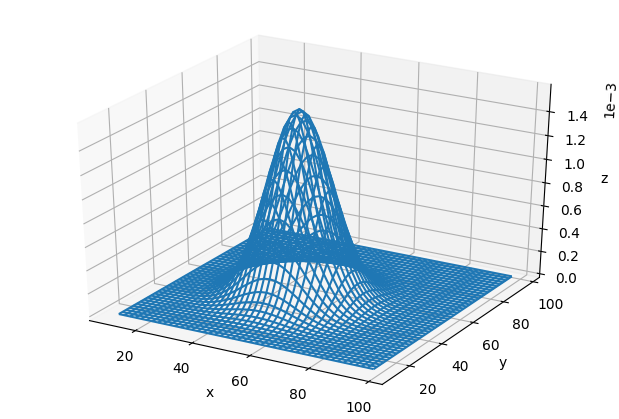

In [5]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[10:100:2,10:100:2]

print(x)
print(y)

pos = np.empty(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y

rv = multivariate_normal([50,50],[[100,0],[0,100]])
z=rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.ticklabel_format(style='sci',axis='z', scilimits=(0,0))

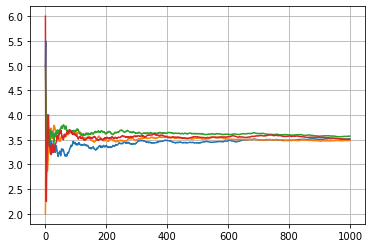

In [10]:
#Law of large numbers
calc_times = 1000

sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times+1)

for i in range(4):
  p = np.random.choice(sample_array, calc_times).cumsum()
  plt.plot(p/number_cnt)
  plt.grid(True)

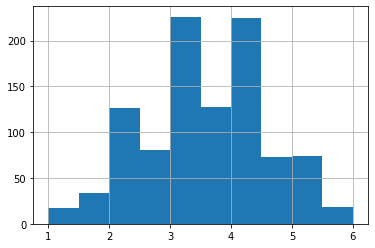

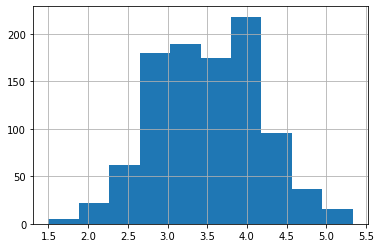

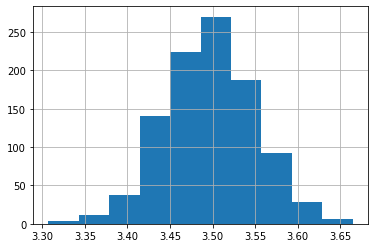

In [13]:
#Central limit theory
def function_central_theory(N):
  smaple_array = np.array([1,2,3,4,5,6])
  mean_array = np.array([])
  for i in range(1000):
    cum_variable = np.random.choice(sample_array, N).cumsum()*1.0
    mean_array = np.append(mean_array, cum_variable[N-1]/N)
  plt.hist(mean_array)
  plt.grid(True)

plt.figure()
function_central_theory(3)
plt.figure()
function_central_theory(6)
plt.figure()
function_central_theory(10**3)


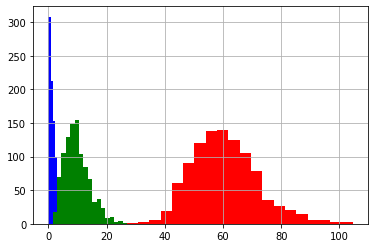

In [14]:
#chi-square distribution
for df, c in zip([2, 10, 60], 'bgr'):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, 20, color=c)
  plt.grid(True)

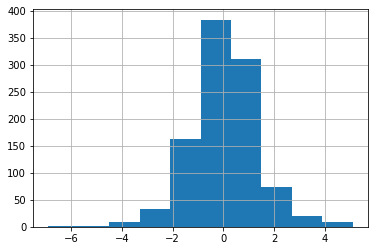

In [15]:
#T distribution
x=np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

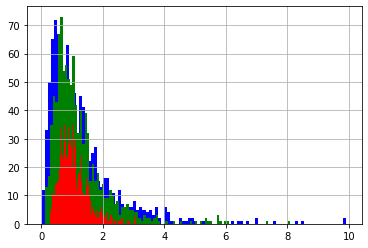

In [16]:
#F distribution
for df, c in zip([(6,7), (10,10), (20,25)], 'bgr'):
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x, 100, color=c)
  plt.grid(True)

Practice_2
1. 使用自由度5, 25, 50的卡方分佈來產生1000個亂數，描繪直方圖
2. 使用自由度1000的t分佈來產生1000個亂數，描繪直方圖
3. 使用自由度(10,30),(20,25)的F分佈來產生1000個亂數，描繪直方圖

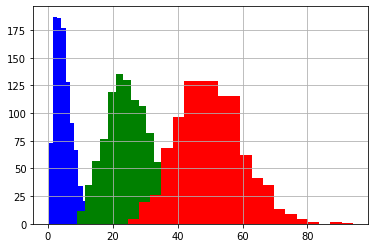

In [17]:
#chi-square distribution
for df, c in zip([5, 25, 50], 'bgr'):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, 20, color=c)
  plt.grid(True)

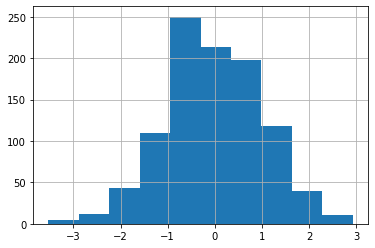

In [18]:
#T distribution
x=np.random.standard_t(1000, 1000)
plt.hist(x)
plt.grid(True)

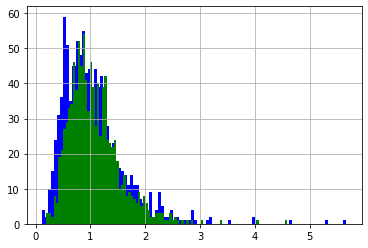

In [19]:
#F distribution
for df, c in zip([(10,30), (20,25)], 'bgr'):
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x, 100, color=c)
  plt.grid(True)

In [21]:
import requests, zipfile  #接受web資料/讀取zip file
from io import StringIO   
import io                 #讀取檔案
from scipy import stats

url='http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r=requests.get(url, stream=True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data_math = pd.read_csv('student-mat.csv', sep=';')
por_score = pd.read_csv('student-por.csv', sep=';')
merged_score=por_score.merge(student_data_math, 
                left_on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                right_on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                suffixes=('_por', '_math'))
merged_score1=pd.merge(student_data_math, por_score,
                on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                suffixes=('_por', '_math'))

t, p = stats.ttest_rel(merged_score1.G1_math, merged_score1.G1_por)
print('p value = ', p)

p value =  1.653655521710079e-16


Practice_3
1. G2,G3數學與葡萄牙語成績比較
2. absences
3. studytime

In [22]:
t, p = stats.ttest_rel(merged_score1.G2_math, merged_score1.G2_por)
print('p value = ', p)
t, p = stats.ttest_rel(merged_score1.G3_math, merged_score1.G3_por)
print('p value = ', p)
t, p = stats.ttest_rel(merged_score1.absences_math, merged_score1.absences_por)
print('p value = ', p)
t, p = stats.ttest_rel(merged_score1.studytime_math, merged_score1.studytime_por)
print('p value = ', p)

p value =  4.0622824801348043e-19
p value =  5.561492113688385e-21
p value =  2.3441656888384195e-06
p value =  0.5643842756976525
